In [3]:
import torch
import matplotlib.pyplot as plt

POINTSNUM = 100                     # 點的數量

# 建立測試資料
n_data = torch.ones(POINTSNUM, 2)   
# 建立全為 1 的 2 X 100 張量(tensor) 各別代表直角坐標(x, y)軸
print(n_data)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [7]:
Coordinate_0 = torch.normal(2*n_data, 1)  # 產生類型0 座標資料
Class_0 = torch.zeros(POINTSNUM)          # 產生類型0 類別資料, 全為 0
print(Coordinate_0)

Coordinate_1 = torch.normal(-2*n_data, 1) # 產生類型1 座標資料
Class_1 = torch.ones(POINTSNUM)           # 產生類型1 類別資料, 全為 1
print(Coordinate_1)

tensor([[ 2.2957,  0.0076],
        [ 1.6948,  1.5055],
        [ 2.5038,  1.7644],
        [ 0.4237,  3.1638],
        [ 1.7986,  1.3257],
        [ 1.3328,  2.7246],
        [ 1.4646,  0.5603],
        [ 0.9003,  1.7668],
        [ 1.5013,  1.4477],
        [ 2.8511,  3.2174],
        [-0.5877,  1.4152],
        [ 2.9916,  2.0771],
        [ 2.7780,  1.7041],
        [ 1.2371, -0.1179],
        [ 2.6238,  2.4751],
        [-1.2605,  1.9216],
        [ 2.5690,  1.9267],
        [ 1.1850,  2.5735],
        [ 2.4331,  3.0038],
        [ 2.2584,  1.3148],
        [ 2.3421,  1.2051],
        [ 1.4566,  1.9228],
        [ 2.1942,  0.9056],
        [ 0.9835,  2.9500],
        [ 2.1605,  2.8512],
        [ 1.7133,  2.9753],
        [ 0.4315, -0.0395],
        [ 0.8679,  3.2348],
        [ 4.2748,  2.2874],
        [ 2.0716,  0.8732],
        [ 0.7978,  1.4031],
        [ 2.0667,  5.2795],
        [ 3.2610,  0.1600],
        [ 2.1687,  0.3981],
        [ 1.3919, -0.7404],
        [ 1.7788,  1

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


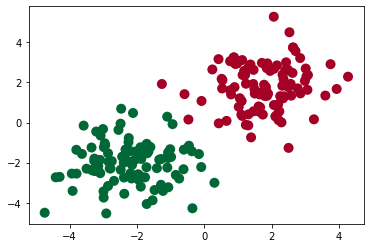

In [9]:
# 使用 torch.cat 合併數據
Coordinate = torch.cat((Coordinate_0, Coordinate_1), 0).type(torch.FloatTensor)  # 將座標資料合併
Class = torch.cat((Class_0, Class_1), ).type(torch.LongTensor)                   # 將類別資料合併
print(Class)

plt.scatter(Coordinate.data.numpy()[:, 0], Coordinate.data.numpy()[:, 1], c=Class.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [2]:
import torch
import torch.nn.functional as F     # 激勵函數

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 定義各層樣式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # nn.Linear(輸入二維張量大小, 輸出二維張量大小)
        self.out = torch.nn.Linear(n_hidden, n_output)       # 上一級的輸出為這級的輸入

    def forward(self, x):
        # 正向傳播輸入值, 神经網路分析出输出值
        x = F.relu(self.hidden(x))      # 激勵函數
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x
                                                 # 類別數 : 2
net = Net(n_feature=2, n_hidden=10, n_output=2)  # 輸入特徵 : 2, 神經元個數 : 10, 輸出特徵 : 2

print(net)  # net 結構

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


c:\users\kaineng\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


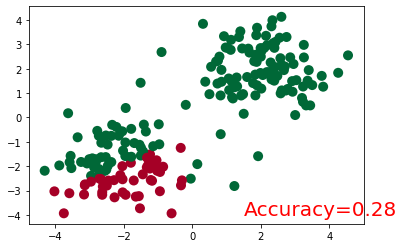

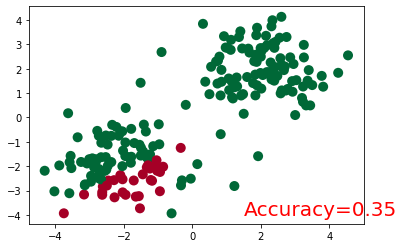

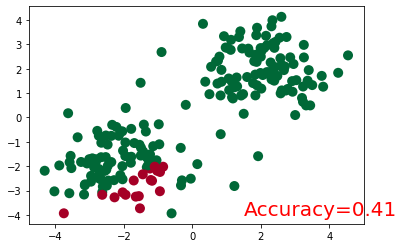

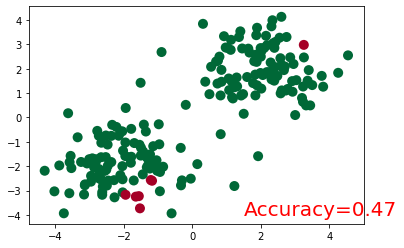

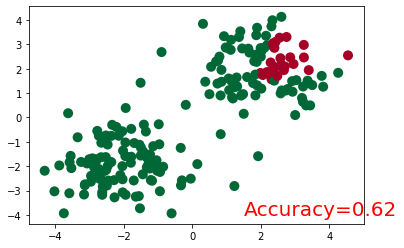

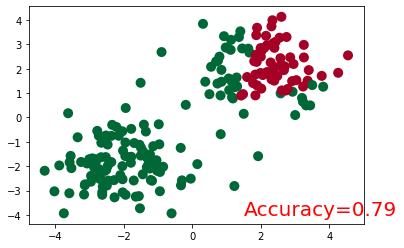

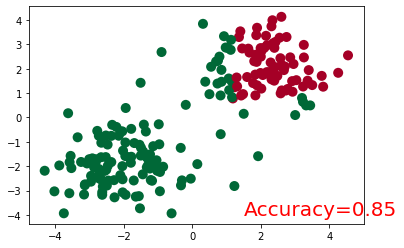

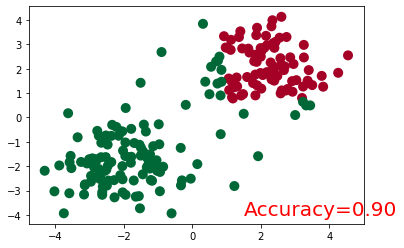

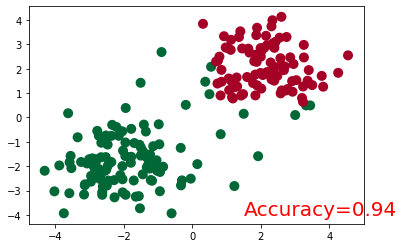

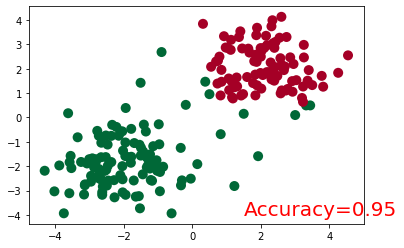

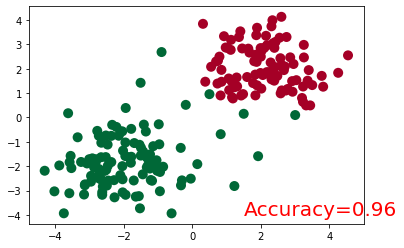

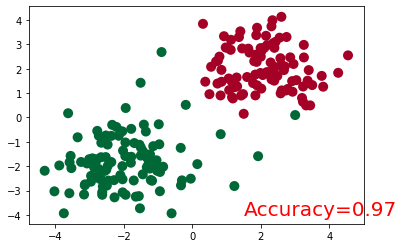

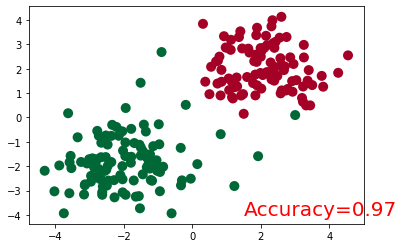

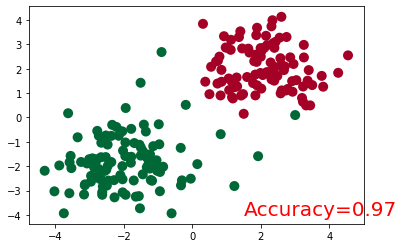

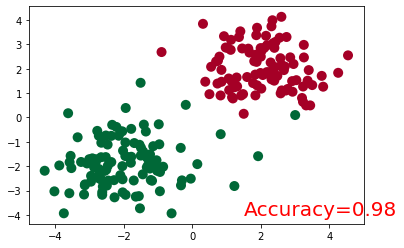

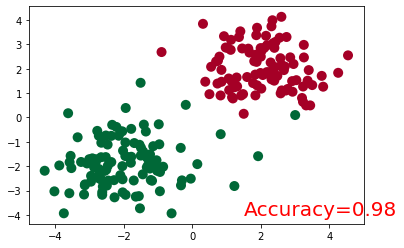

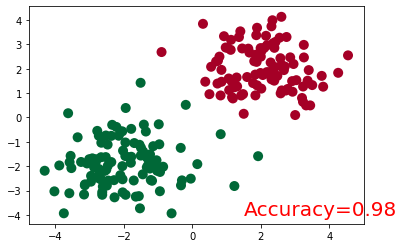

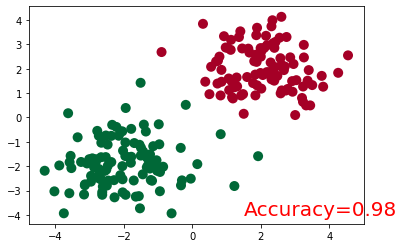

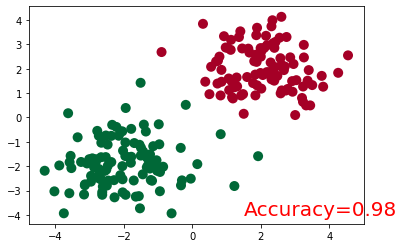

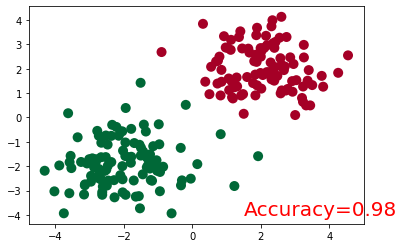

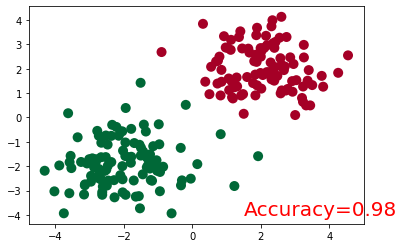

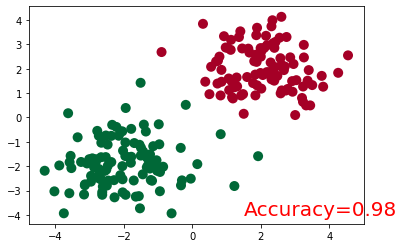

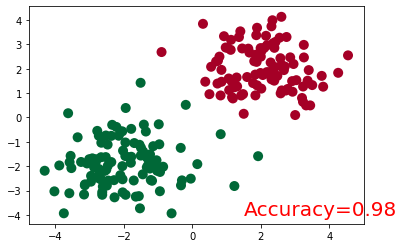

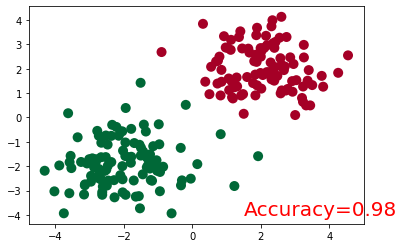

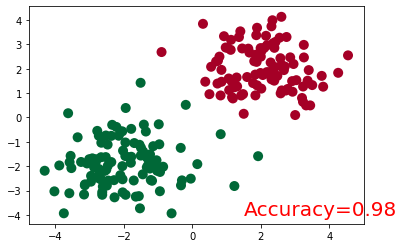

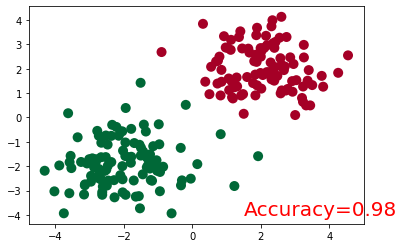

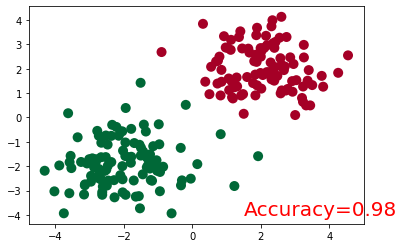

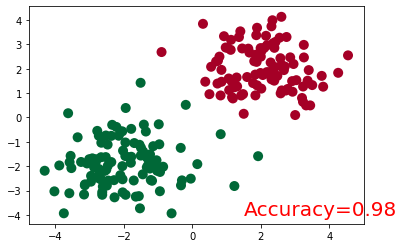

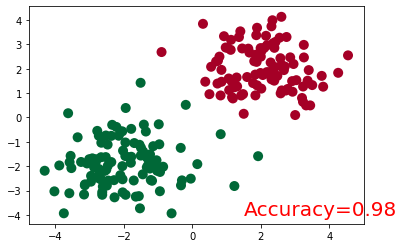

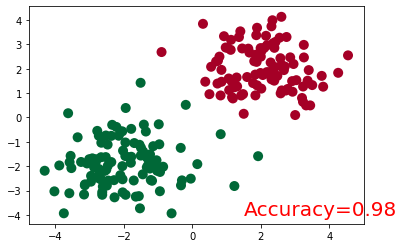

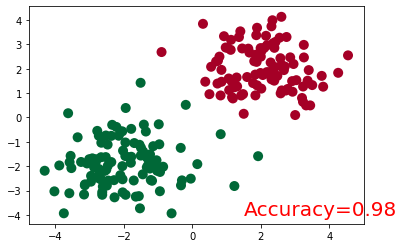

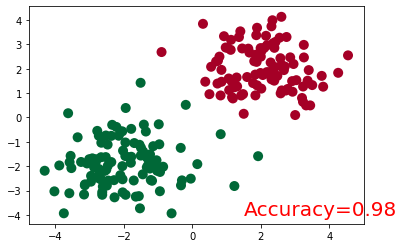

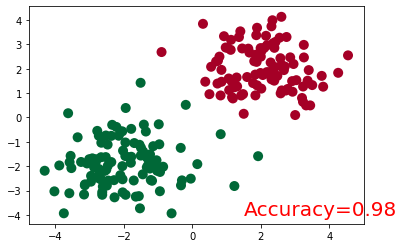

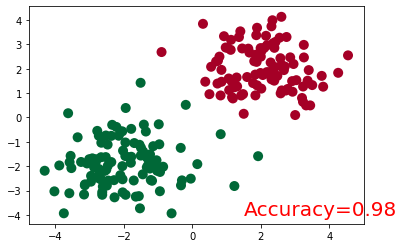

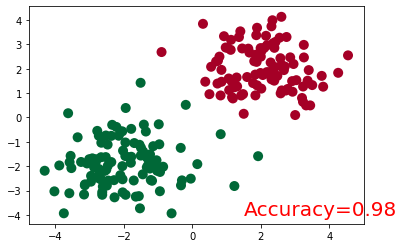

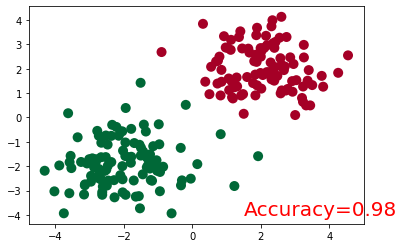

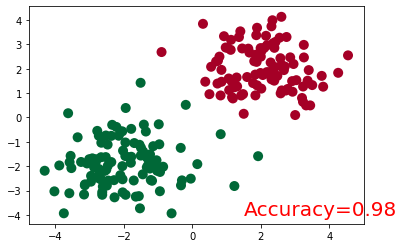

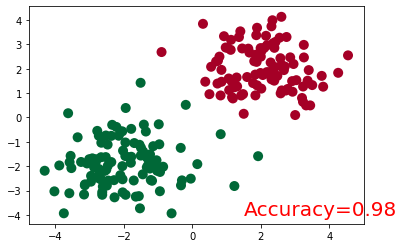

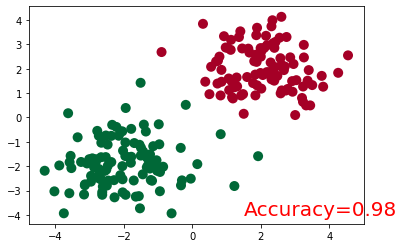

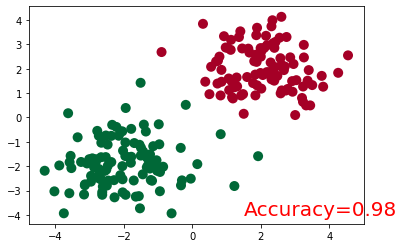

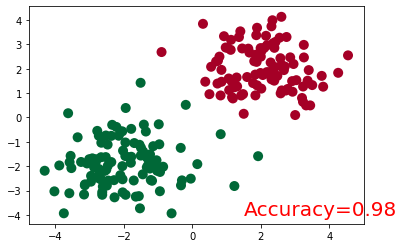

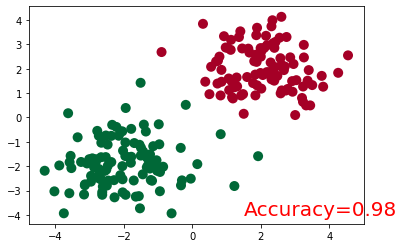

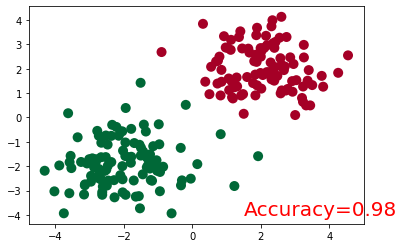

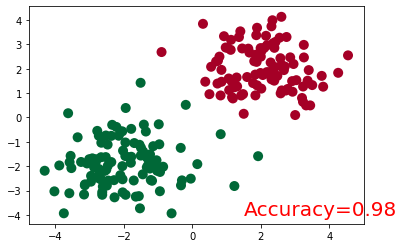

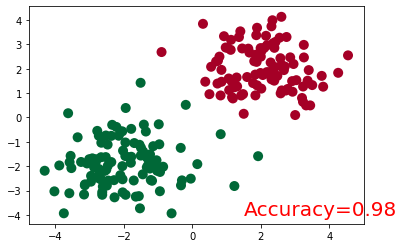

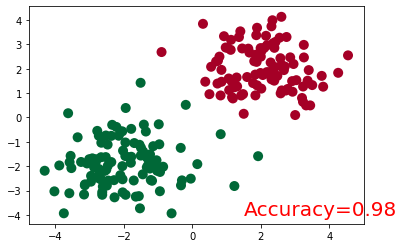

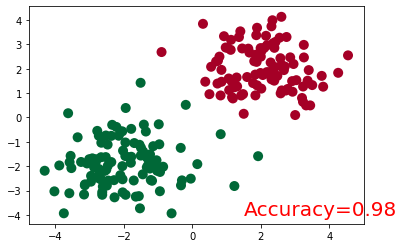

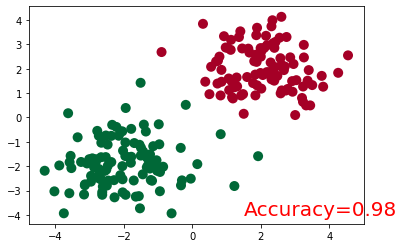

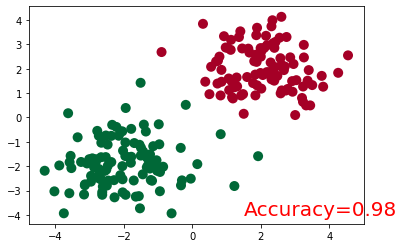

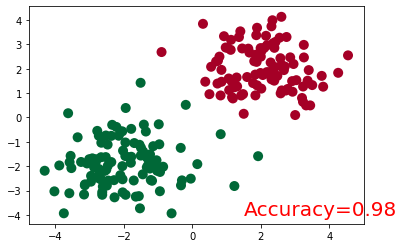

In [3]:
import matplotlib.pyplot as plt

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(100):
    out = net(Coordinate)     # 輸入座標到網絡內

    loss = loss_func(out, Class)     # 計算誤差

    optimizer.zero_grad()   # 清空上一步的數據
    loss.backward()
    optimizer.step()

    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]    # 通過 softmax 的激勵函數(用於多分類神經網絡輸出)
        pred_Class = prediction.data.numpy().squeeze()
        target_Class = Class.data.numpy()
        plt.scatter(Coordinate.data.numpy()[:, 0], Coordinate.data.numpy()[:, 1], c=pred_Class, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_Class == target_Class)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()